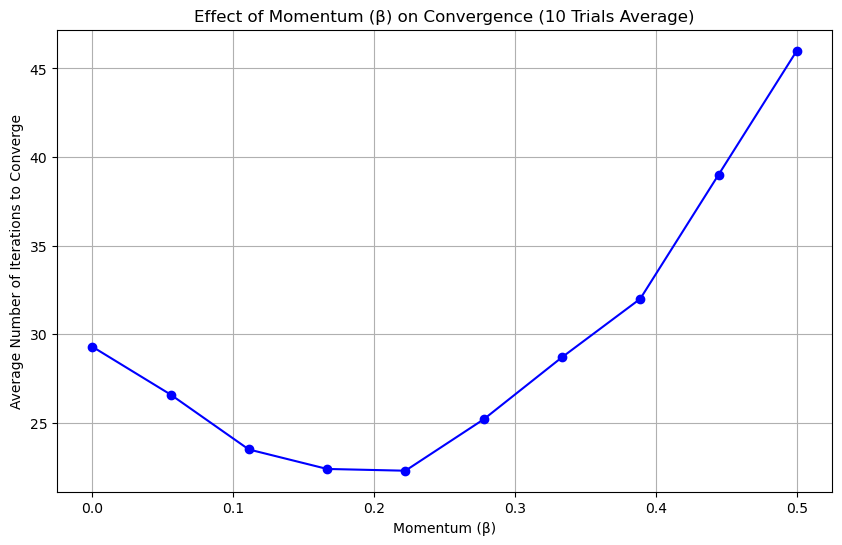

Résultats (moyenne sur plusieurs essais) :
β = 0.00 → 29.30 itérations (moyenne)
β = 0.06 → 26.60 itérations (moyenne)
β = 0.11 → 23.50 itérations (moyenne)
β = 0.17 → 22.40 itérations (moyenne)
β = 0.22 → 22.30 itérations (moyenne)
β = 0.28 → 25.20 itérations (moyenne)
β = 0.33 → 28.70 itérations (moyenne)
β = 0.39 → 32.00 itérations (moyenne)
β = 0.44 → 39.00 itérations (moyenne)
β = 0.50 → 46.00 itérations (moyenne)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])
b = np.array([4, 7, 3])

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000
alpha = 0.5  # Relaxation parameter

# Pre-calculate the norm of each row of matrix A
norms = np.sum(A ** 2, axis=1)
lol = 0
# Main Kaczmarz algorithm with momentum
def Kaczmarz_momentum(beta):
    def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
        Transpose_a = np.dot(A_row, inconnue)
        atixi = (b_value - Transpose_a) / norm
        inconnue += atixi * A_row
        return inconnue

    def Kaczmarz_one_loop(inconnue):
        all_inconnue = np.zeros_like(inconnue)
        for i in range(len(A)):
            all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])
        return all_inconnue / len(A)

    def convergence(inconnue, x_old):
        return np.linalg.norm(inconnue - x_old) < tolerance

    x = np.random.rand(3)  # Random initialization
    x_old = np.zeros_like(x)
    momentum = np.zeros_like(x)

    for iteration in range(max_iterations):
        x_old[:] = x
        update = Kaczmarz_one_loop(x)

        # Applying momentum
        new_x = (1 - alpha) * x + alpha * update
        x = new_x + beta * momentum
        momentum = x - x_old  # Update momentum

        if convergence(x, x_old):
            return iteration + 1  # Return the number of iterations

    return max_iterations  # If convergence is not reached

# Test different beta values with multiple runs
def test_momentum(beta_values, n_trials=10000):
    results = {}
    for beta in beta_values:
        iterations_list = [Kaczmarz_momentum(beta) for i in range(n_trials)]
        avg_iterations = np.mean(iterations_list)  # Compute average iterations
        results[beta] = avg_iterations
    return results

# Define beta values and test
beta_values = np.linspace(0, 0.5, 10)  # Test values between 0 and 0.5
n_trials = 10  # Number of times we repeat for each beta
results = test_momentum(beta_values, n_trials)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(beta_values, list(results.values()), marker='o', linestyle='-', color='blue')
plt.title(f'Effect of Momentum (β) on Convergence ({n_trials} Trials Average)')
plt.xlabel('Momentum (β)')
plt.ylabel('Average Number of Iterations to Converge')
plt.grid(True)
plt.show()

# Display results
print("Résultats (moyenne sur plusieurs essais) :")
for beta, avg_iterations in results.items():
    print(f"β = {beta:.2f} → {avg_iterations:.2f} itérations (moyenne)")

Testing system size 3x3...
Testing system size 5x5...
Testing system size 10x10...
Testing system size 20x20...


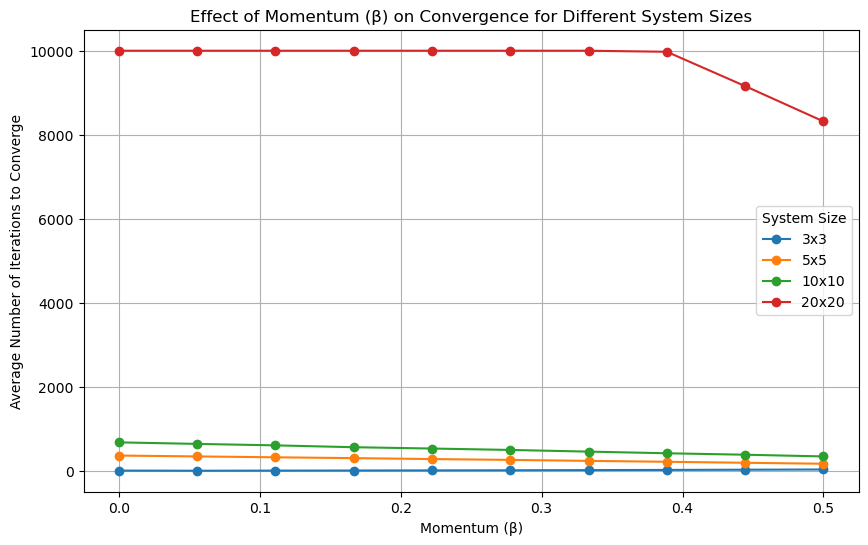


Results (average over multiple trials):

System Size: 3x3
β = 0.00 → 14.60 iterations (average)
β = 0.06 → 11.50 iterations (average)
β = 0.11 → 14.00 iterations (average)
β = 0.17 → 16.40 iterations (average)
β = 0.22 → 19.00 iterations (average)
β = 0.28 → 22.00 iterations (average)
β = 0.33 → 26.00 iterations (average)
β = 0.39 → 30.70 iterations (average)
β = 0.44 → 35.60 iterations (average)
β = 0.50 → 40.70 iterations (average)

System Size: 5x5
β = 0.00 → 372.10 iterations (average)
β = 0.06 → 351.70 iterations (average)
β = 0.11 → 330.60 iterations (average)
β = 0.17 → 310.90 iterations (average)
β = 0.22 → 288.80 iterations (average)
β = 0.28 → 269.00 iterations (average)
β = 0.33 → 245.50 iterations (average)
β = 0.39 → 224.20 iterations (average)
β = 0.44 → 200.20 iterations (average)
β = 0.50 → 177.20 iterations (average)

System Size: 10x10
β = 0.00 → 685.70 iterations (average)
β = 0.06 → 649.50 iterations (average)
β = 0.11 → 614.60 iterations (average)
β = 0.17 → 570.7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
TOLERANCE = 1e-6
MAX_ITERATIONS = 10000
ALPHA = 0.5  # Relaxation parameter
N_TRIALS = 10  # Number of repetitions per test
BETA_VALUES = np.linspace(0, 0.5, 10)  # Test beta values

# Function to generate a random well-conditioned system of size (n x n)
def generate_system(n):
    A = 2.0 * np.random.rand(n, n) - np.ones((n, n))
    for i in range(n):
        norm = np.linalg.norm(A[i, :])
        A[i, :] = A[i, :] / norm  # Normalize rows to avoid instability
    b = 2.0 * np.random.rand(n) - np.ones(n)
    return A, b

# Main Kaczmarz algorithm with momentum
def Kaczmarz_momentum(A, b, beta):
    norms = np.sum(A ** 2, axis=1)
    
    def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
        atixi = (b_value - np.dot(A_row, inconnue)) / norm
        inconnue += atixi * A_row
        return inconnue

    def Kaczmarz_one_loop(inconnue):
        all_inconnue = np.zeros_like(inconnue)
        for i in range(len(A)):
            all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])
        return all_inconnue / len(A)

    def convergence(inconnue, x_old):
        return np.linalg.norm(inconnue - x_old) < TOLERANCE

    x = np.random.rand(len(b))  # Random initialization
    x_old = np.zeros_like(x)
    momentum = np.zeros_like(x)

    for iteration in range(MAX_ITERATIONS):
        x_old[:] = x
        update = Kaczmarz_one_loop(x)
        x = (1 - ALPHA) * x + ALPHA * update + beta * momentum
        momentum = x - x_old  # Update momentum

        if convergence(x, x_old):
            return iteration + 1  # Return the number of iterations

    return MAX_ITERATIONS  # If convergence is not reached

# Test momentum effect for different system sizes
def test_different_sizes(sizes, beta_values, n_trials):
    results = {size: {} for size in sizes}
    for size in sizes:
        print(f"Testing system size {size}x{size}...")
        A, b = generate_system(size)
        for beta in beta_values:
            iterations_list = [Kaczmarz_momentum(A, b, beta) for _ in range(n_trials)]
            avg_iterations = np.mean(iterations_list)
            results[size][beta] = avg_iterations
    return results

# Define different system sizes
SYSTEM_SIZES = [3, 5, 10, 20]  # Different complexities
results = test_different_sizes(SYSTEM_SIZES, BETA_VALUES, N_TRIALS)

# Visualization
plt.figure(figsize=(10, 6))
for size in SYSTEM_SIZES:
    plt.plot(BETA_VALUES, list(results[size].values()), marker='o', linestyle='-', label=f'{size}x{size}')
plt.title(f'Effect of Momentum (β) on Convergence for Different System Sizes')
plt.xlabel('Momentum (β)')
plt.ylabel('Average Number of Iterations to Converge')
plt.legend(title='System Size')
plt.grid(True)
plt.show()

# Display results
print("\nResults (average over multiple trials):")
for size, res in results.items():
    print(f"\nSystem Size: {size}x{size}")
    for beta, avg_iterations in res.items():
        print(f"β = {beta:.2f} → {avg_iterations:.2f} iterations (average)")


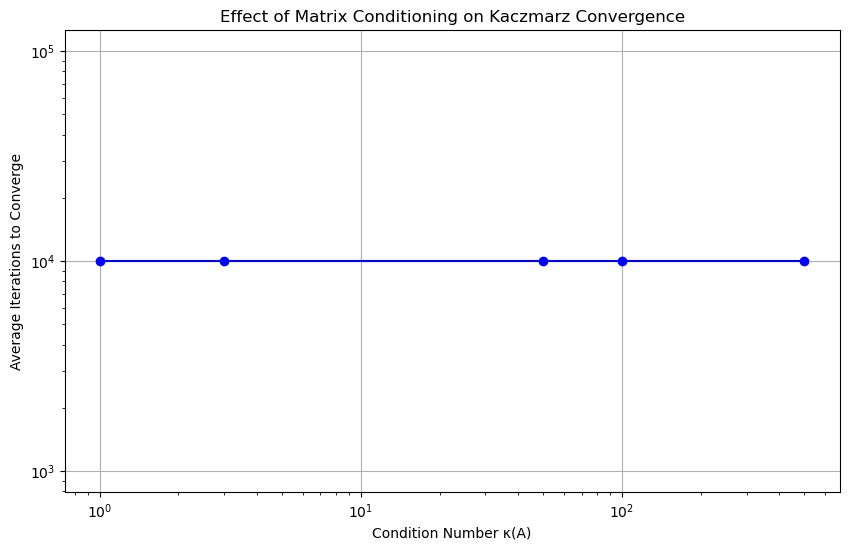

κ(A) = 1: 10000 iterations
κ(A) = 3: 10000 iterations
κ(A) = 50: 10000 iterations
κ(A) = 100: 10000 iterations
κ(A) = 500: 10000 iterations


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cond, solve, norm

# Configuration
tolerance = 1e-6
max_iterations = 10000
alpha = 0.5  # Relaxation parameter
beta = 0.3   # Fixed momentum for all tests

# Fonction pour générer des matrices avec des nombres de condition spécifiques
def generate_matrix(size, cond_number):
    U, _ = np.linalg.qr(np.random.randn(size, size))  # Matrice orthogonale
    V, _ = np.linalg.qr(np.random.randn(size, size))
    S = np.diag(np.geomspace(1, cond_number, size))  # Valeurs propres contrôlées
    return U @ S @ V.T

# Génération de 5 matrices avec différents nombres de condition
sizes = [5] * 5  # Toutes de taille 5x5
condition_numbers = [1, 3, 50, 100, 500]  # Très bien à très mal conditionnées
matrices = [generate_matrix(5, cn) for cn in condition_numbers]

# Fonction Kaczmarz avec momentum
def kaczmarz_momentum(A, b, beta):
    norms = np.sum(A ** 2, axis=1)
    x = np.random.rand(len(b))
    x_old = np.zeros_like(x)
    momentum = np.zeros_like(x)
    
    for iteration in range(max_iterations):
        x_old[:] = x
        update = sum((b[i] - np.dot(A[i], x)) / norms[i] * A[i] for i in range(len(A))) / len(A)
        x = (1 - alpha) * x + alpha * update + beta * momentum
        momentum = x - x_old
        if norm(A @ x - b) < tolerance:
            return iteration + 1
    return max_iterations

# Exécution des tests
results = {}
b = np.random.rand(5)  # Même second membre pour tous les tests

for i, (A, kappa) in enumerate(zip(matrices, condition_numbers)):
    iterations = kaczmarz_momentum(A, b, beta)
    results[kappa] = iterations

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(condition_numbers, list(results.values()), marker='o', linestyle='-', color='blue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Condition Number κ(A)")
plt.ylabel("Average Iterations to Converge")
plt.title("Effect of Matrix Conditioning on Kaczmarz Convergence")
plt.grid(True)
plt.show()

# Affichage des résultats numériques
for kappa, iters in results.items():
    print(f"κ(A) = {kappa}: {iters} iterations")
